Libraries involved and used

In [34]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import Data & Rename Columns

In [35]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/dataaset.csv


In [36]:
df = pd.read_csv('/kaggle/input/dataset/dataaset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Descriptive stats

In [38]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


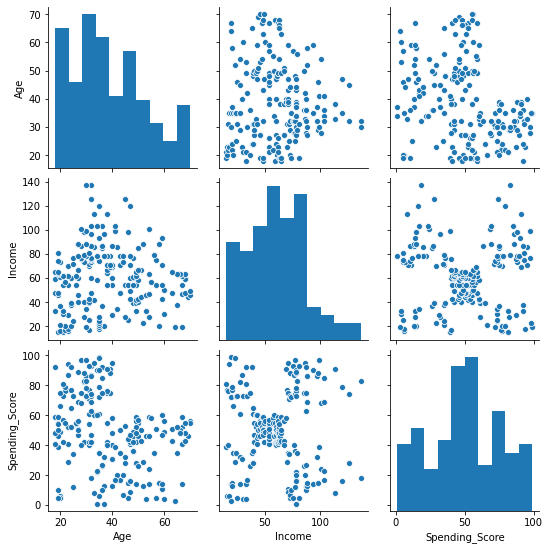

In [39]:
sns.pairplot(df[['Age','Income', 'Spending_Score']])

Perform K-Mean Clustering with 5 Clusters

In [40]:
import sklearn.cluster as cluster

In [41]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [42]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

Attach Clusters to the Original Data

In [43]:
df['Clusters'] = kmeans.labels_

In [44]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [45]:
df['Clusters'].value_counts()

0    81
3    39
2    35
4    23
1    22
Name: Clusters, dtype: int64

Export Data with Clusters

In [46]:
df.to_csv('mallClusters.csv', index = False)

Plot Cluster on Chart

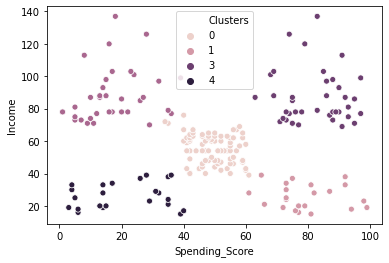

In [47]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

THE END